In [69]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline

Câu 1

In [70]:
from google.colab import drive
drive.mount('/content/drive')

# Đường dẫn đến file
file_path = '/content/drive/My Drive/KTDL/Data/Mall_Customers.csv'

# Đọc file CSV
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [72]:
# Thống kê các cột số
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [73]:
# Kiểm tra dữ liệu bị thiếu
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Câu 2

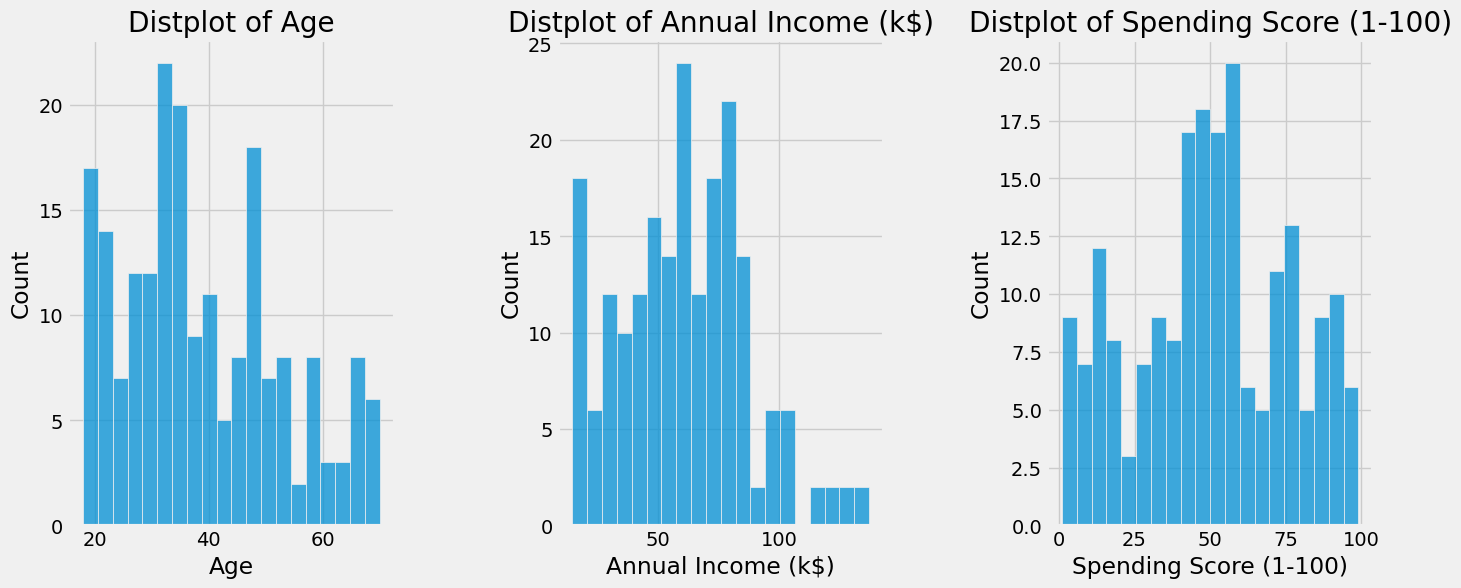

In [74]:
plt.style.use('fivethirtyeight')
plt.figure(1, figsize=(15, 6))

n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(df[x], bins=20)
    plt.title('Distplot of {}'.format(x))
plt.show()

Câu 3 Thống kê số mẫu dữ liệu theo giới tính.

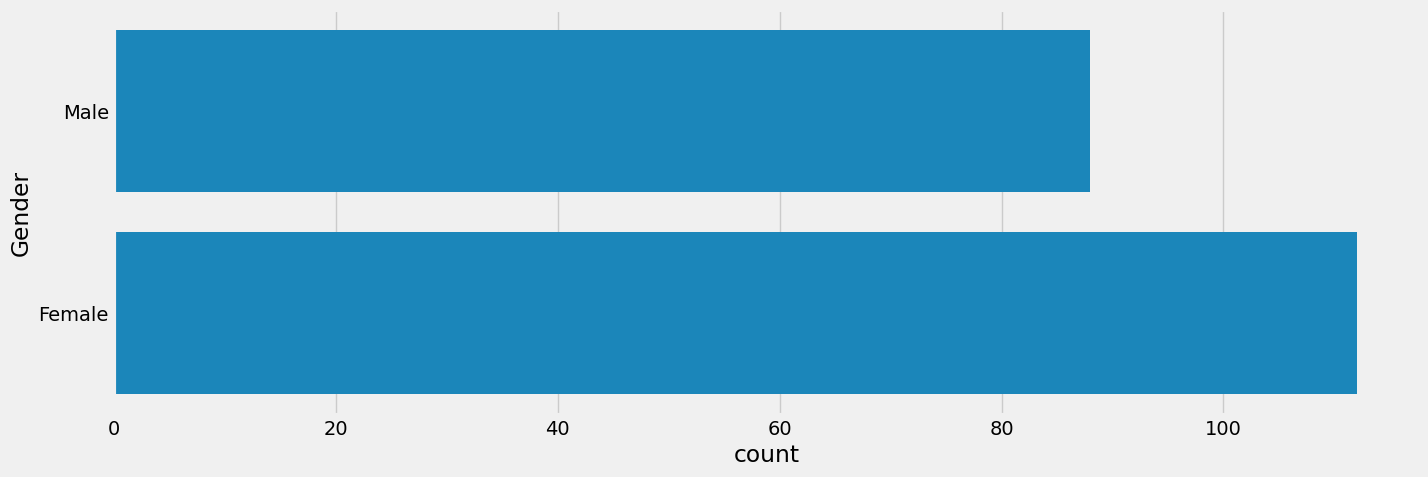

In [75]:
plt.figure(1, figsize=(15, 5))
sns.countplot(y='Gender', data=df)
plt.show()

Câu 4 Khảo sát phân bố của thuộc tính Tuổi và Thu nhập hằng năm theo Giới tính.

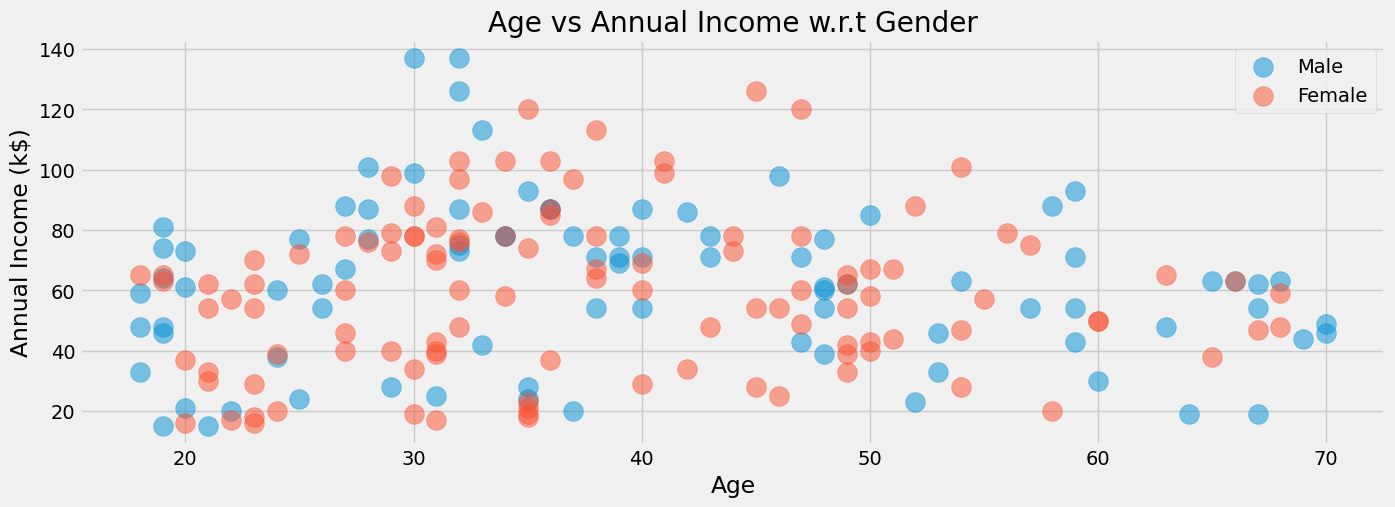

In [76]:
plt.figure(1, figsize=(15, 5))
for gender in ['Male', 'Female']:
    plt.scatter(x='Age', y='Annual Income (k$)', data=df[df['Gender'] == gender],
                s=200, alpha=0.5, label=gender)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

Câu 5 Khảo sát sự phân bố của thuộc tính Thu nhập hằng năm và Số điểm mua sắm theo Giới tính.

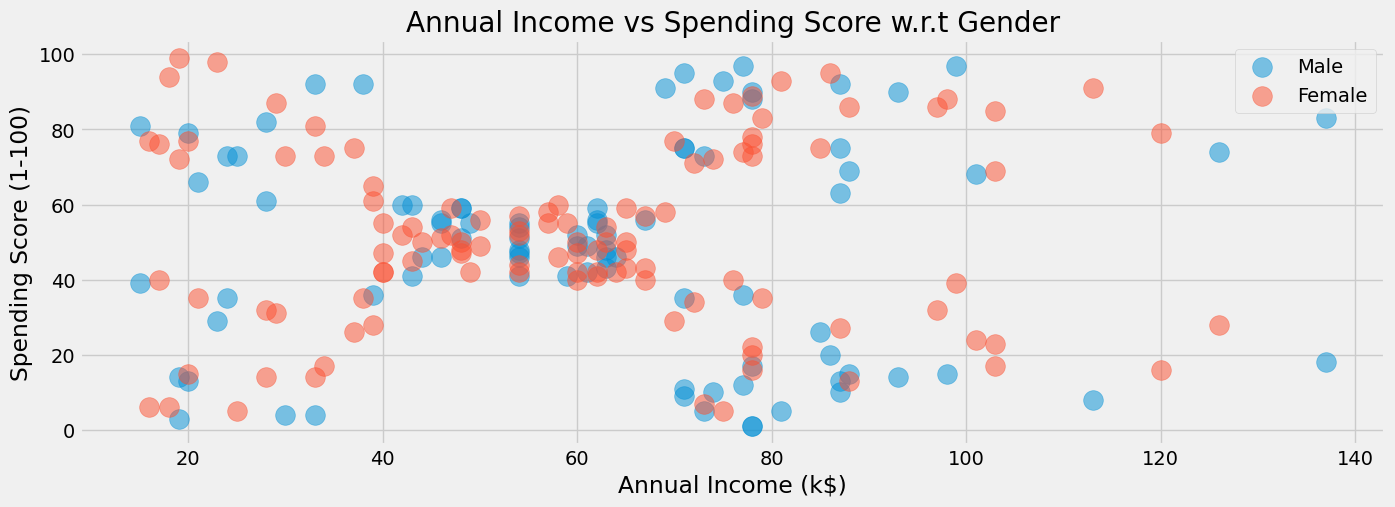

In [77]:
plt.figure(1, figsize=(15, 5))
for gender in ['Male', 'Female']:
    plt.scatter(x='Annual Income (k$)',
                y='Spending Score (1-100)',
                data=df[df['Gender'] == gender],
                s=200, alpha=0.5, label=gender)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

Câu 6 Xác định số cụm cần thiết.

In [78]:
X1 = df[['Age', 'Spending Score (1-100)']].iloc[:, :].values
inertia = []
for n in range(1, 11):
    algorithm = KMeans(n_clusters=n, init='random')
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

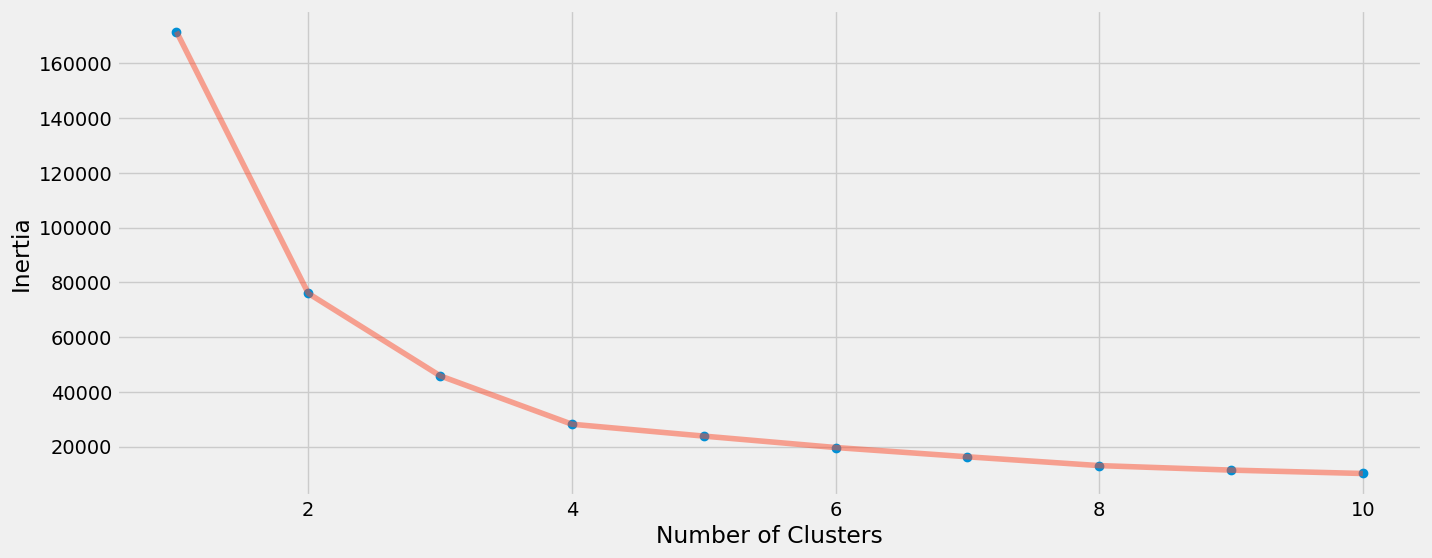

In [79]:
plt.figure(1, figsize=(15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha=0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

  Từ biểu đồ ta chọn k=4

In [80]:
algorithm = KMeans(n_clusters=4, init='random')
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

Câu 7 Biểu diễn kết quả gom cụm bằng biểu đồ

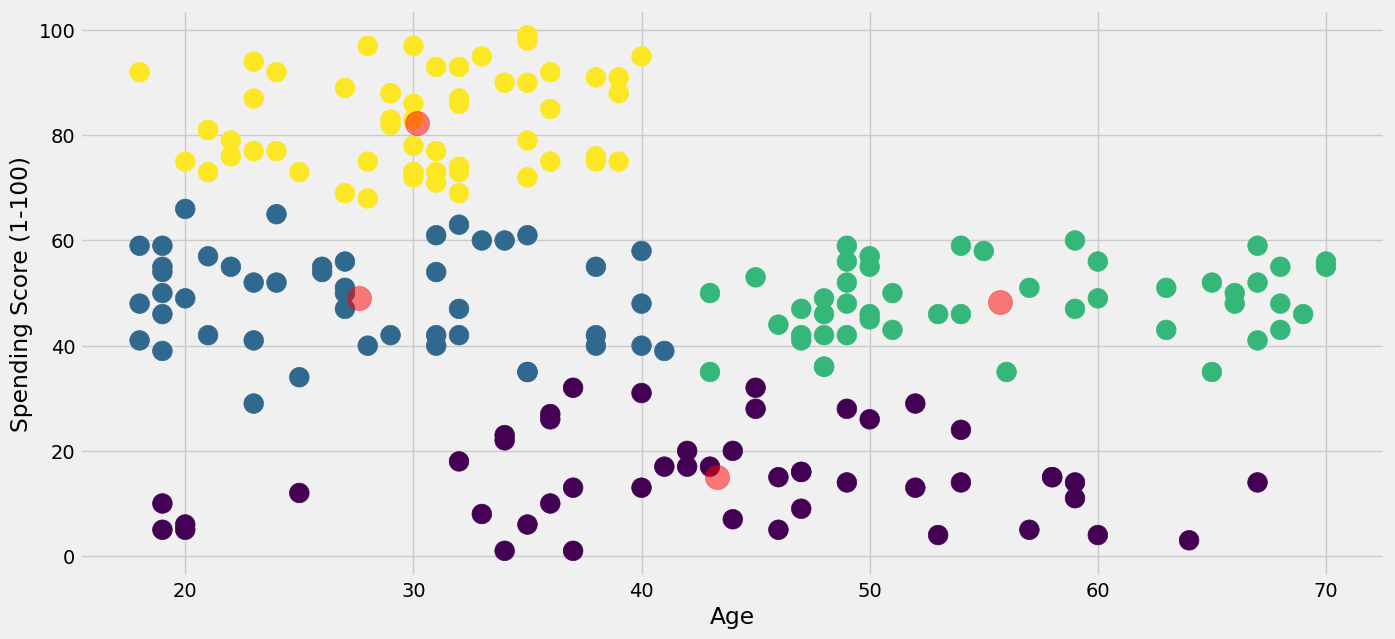

In [81]:
plt.figure(1, figsize=(15, 7))
plt.clf()
plt.scatter(x='Age', y='Spending Score (1-100)', data=df, c=labels1, s=200)
plt.scatter(x=centroids1[:, 0], y=centroids1[:, 1], s=300, c='red', alpha=0.5)
plt.ylabel('Spending Score (1-100)'), plt.xlabel('Age')
plt.show()

Câu 8 Đánh giá kết quả gom cụm bằng Hệ số Dáng điệu (Silhouette coefficient)

In [82]:
metrics.silhouette_score(X1, labels1, metric='euclidean')

0.49973941540141753

Câu 9 Gom cụm theo các thuộc tính:
- Thu nhập hằng năm và Số điểm mua sắm.
- Tuổi, Thu nhập hằng năm và Số điểm mua sắm.

In [83]:
# Thu nhập hằng năm và Số điểm mua sắm.
'Xác định số cụm cần thiết '
X2 = df[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values
inertia2 = []
for n in range(1, 11):
    algorithm2 = KMeans(n_clusters=n, init='random')
    algorithm2.fit(X2)
    inertia2.append(algorithm2.inertia_)

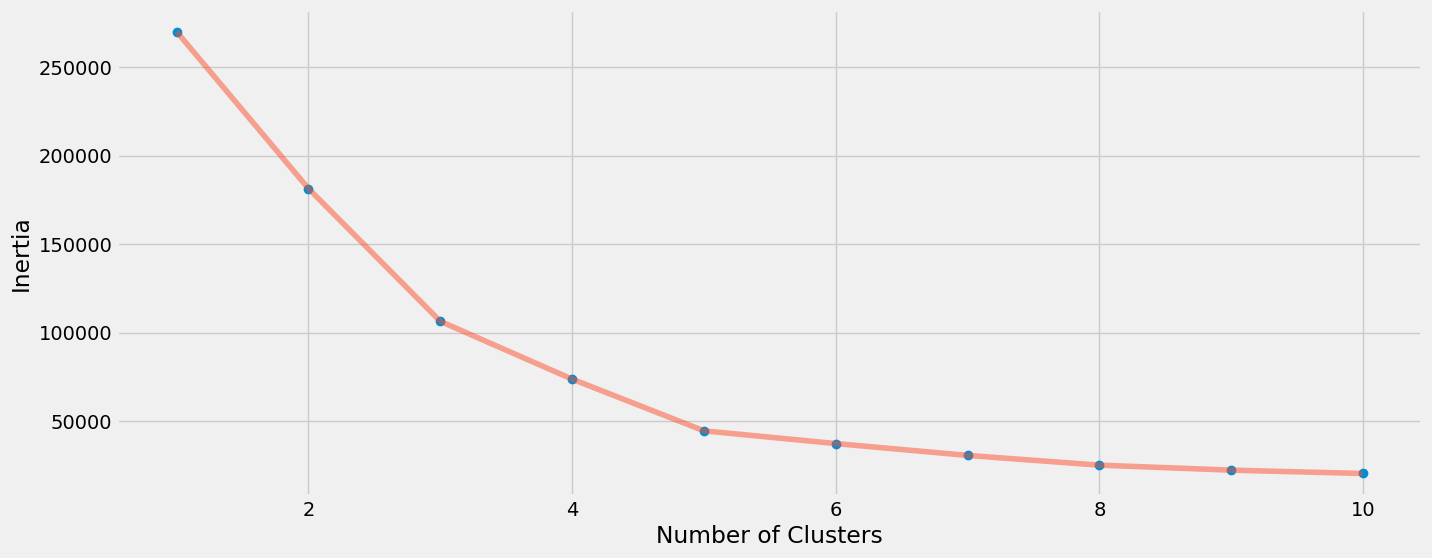

In [84]:
plt.figure(1, figsize=(15, 6))
plt.plot(np.arange(1, 11), inertia2, 'o')
plt.plot(np.arange(1, 11), inertia2, '-', alpha=0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

Từ biểu đồ ta chọn k=5

In [85]:
algorithm2 = KMeans(n_clusters=5, init='random')
algorithm2.fit(X2)
labels2 = algorithm2.labels_
centroids2 = algorithm2.cluster_centers_

In [86]:
# Tuổi, Thu nhập hằng năm và Số điểm mua sắm.
'Xác định số cụm cần thiết '
X3 = df[['Age','Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values
inertia3 = []
for n in range(1, 11):
    algorithm3 = KMeans(n_clusters=n, init='random')
    algorithm3.fit(X3)
    inertia3.append(algorithm3.inertia_)

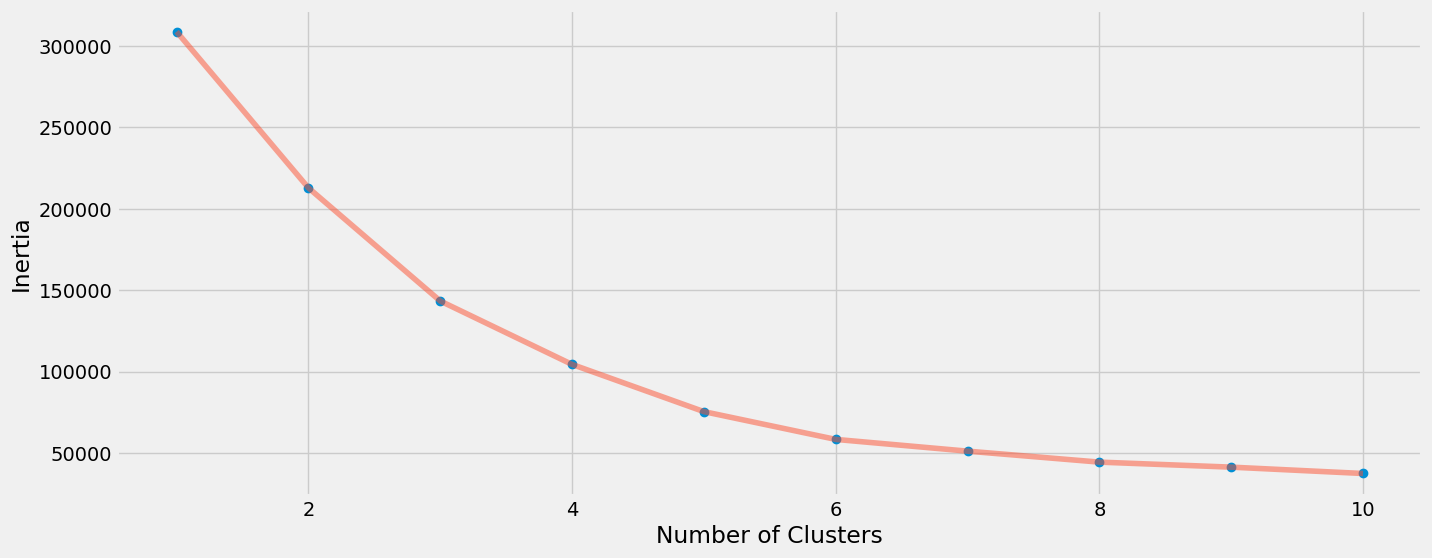

In [87]:
plt.figure(1, figsize=(15, 6))
plt.plot(np.arange(1, 11), inertia3, 'o')
plt.plot(np.arange(1, 11), inertia3, '-', alpha=0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

Từ biểu đồ ta chọn k=6

In [88]:
algorithm3 = KMeans(n_clusters=6, init='random')
algorithm3.fit(X3)
labels3 = algorithm3.labels_
centroids3 = algorithm3.cluster_centers_

In [90]:
df['label3'] = labels3

# Tạo trace cho biểu đồ 3D
trace1 = go.Scatter3d(
    x=df['Age'],
    y=df['Spending Score (1-100)'],
    z=df['Annual Income (k$)'],
    mode='markers',
    marker=dict(
        color=df['label3'],
        size=20,
        line=dict(
            color=df['label3'],
            width=12
        ),
        opacity=0.8
    )
)

# Tạo layout cho biểu đồ
layout = go.Layout(
    title='Clusters',
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Spending Score'),
        zaxis=dict(title='Annual Income')
    )
)

# Tạo figure và hiển thị biểu đồ
fig = go.Figure(data=[trace1], layout=layout)
py.offline.iplot(fig)

In [54]:
!pip install nbconvert

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
%cd '/content/drive/My Drive/KTDL'

/content/drive/My Drive/KTDL


In [68]:
!jupyter nbconvert --to html Cau3_BTTuan5.ipynb

[NbConvertApp] Converting notebook Cau3_BTTuan5.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 8 image(s).
[NbConvertApp] Writing 1034363 bytes to Cau3_BTTuan5.html
